In [2]:
### import the packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

In [3]:
## importing the data 
df = pd.read_csv('heart_attack_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


# **EDA**

In [4]:
df.shape

(8763, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [7]:
df['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

> **heart attack risk (1: Yes, 0: No)**  
**The classes are  imbalance**   

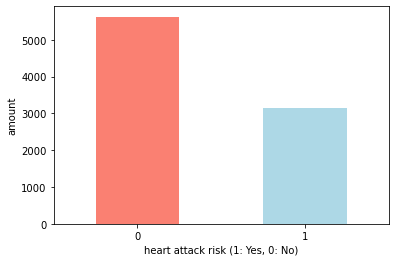

In [8]:
df['Heart Attack Risk'].value_counts().plot(kind='bar', color=['salmon','lightblue'])
plt.xlabel('heart attack risk (1: Yes, 0: No)')
plt.ylabel('amount')
plt.xticks(rotation=0);

In [9]:
df.Sex.value_counts()

Male      6111
Female    2652
Name: Sex, dtype: int64

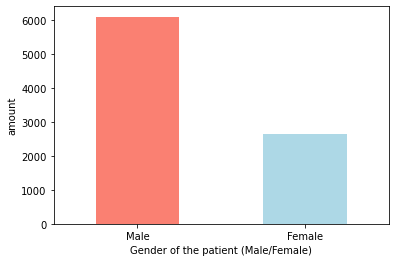

In [10]:
df['Sex'].value_counts().plot(kind='bar', color=['salmon','lightblue'])
plt.xlabel('Gender of the patient (Male/Female)')
plt.ylabel('amount')
plt.xticks(rotation=0);

In [11]:
pd.crosstab(df['Heart Attack Risk'], df.Sex)

Sex,Female,Male
Heart Attack Risk,,
0,1708,3916
1,944,2195


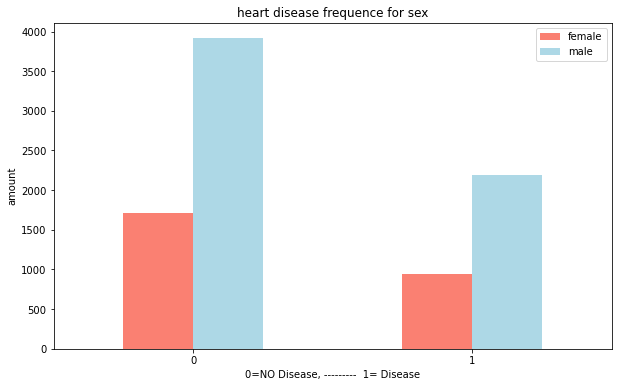

In [12]:
### create plot of crosstab
pd.crosstab(df['Heart Attack Risk'], df.Sex).plot(kind='bar',
                                    figsize=(10,6), 
                                    color=['salmon', 'lightblue'])
plt.title('heart disease frequence for sex')
plt.xlabel('0=NO Disease, ---------  1= Disease')
plt.ylabel('amount')
plt.legend(['female','male'])
plt.xticks(rotation=0);

In [13]:
pd.crosstab(df['Heart Attack Risk'], df.Country).T

Heart Attack Risk,0,1
Country,,
Argentina,297,174
Australia,281,168
Brazil,299,163
Canada,282,158
China,281,155
Colombia,267,162
France,289,157
Germany,305,172
India,283,129


In [14]:
pd.crosstab(df['Heart Attack Risk'], df.Continent).T

Heart Attack Risk,0,1
Continent,,
Africa,551,322
Asia,1643,900
Australia,565,319
Europe,1466,775
North America,536,324
South America,863,499


In [15]:
# Smoking: Smoking status of the patient (1: Smoker, 0: Non-smoker)
df['Smoking'].value_counts()

1    7859
0     904
Name: Smoking, dtype: int64

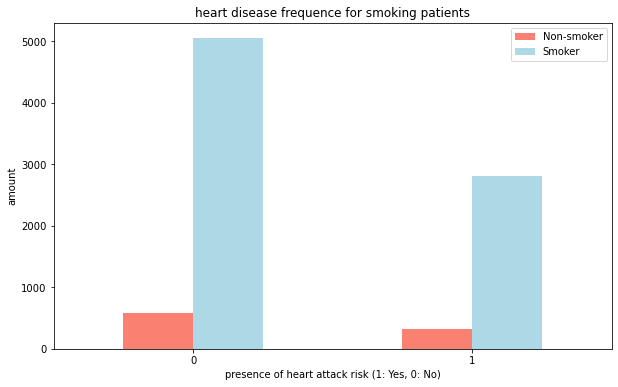

In [16]:
pd.crosstab(df['Heart Attack Risk'], df.Smoking).plot(kind='bar',
                                                 figsize=(10,6),
                                                 color=['salmon', 'lightblue'])
plt.title('heart disease frequence for smoking patients')
plt.xlabel('presence of heart attack risk (1: Yes, 0: No)')
plt.ylabel('amount')
plt.legend(['Non-smoker','Smoker'])
plt.xticks(rotation=0);

In [17]:
df.corr()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,0.000274


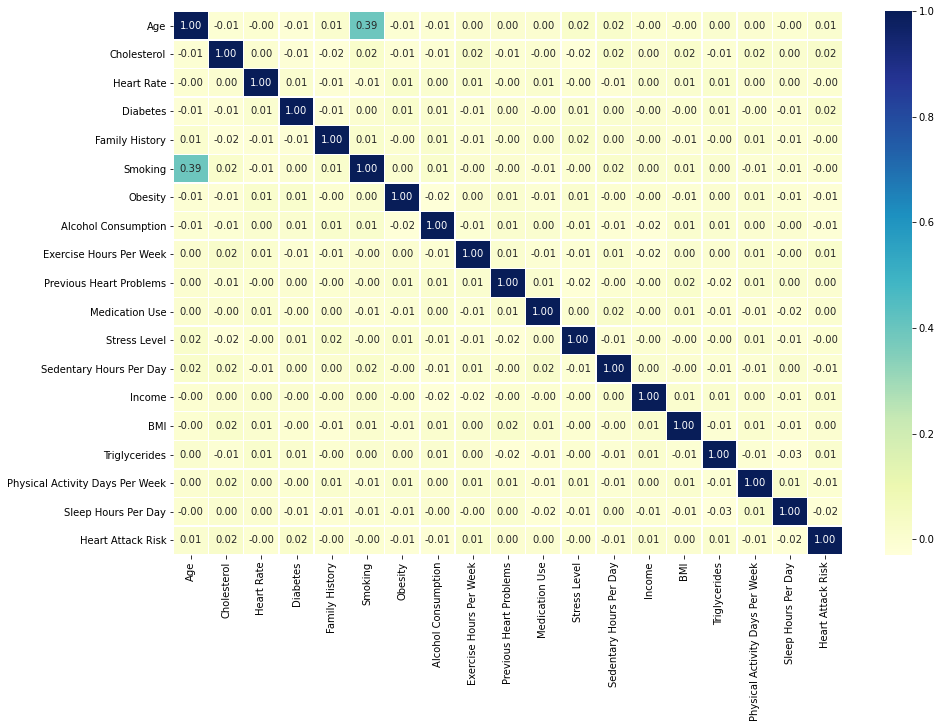

In [18]:
## make our correlation with heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax  = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

In [19]:
## the data is clean from missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [20]:
df.head().T

,0,1,2,3,4
Patient ID,BMW7812,CZE1114,BNI9906,JLN3497,GFO8847
Age,67,21,21,84,66
Sex,Male,Male,Female,Male,Male
Cholesterol,208,389,324,383,318
Blood Pressure,158/88,165/93,174/99,163/100,91/88
Heart Rate,72,98,72,73,93
Diabetes,0,1,1,1,1
Family History,0,1,0,1,1
Smoking,1,1,0,1,1
Obesity,0,1,0,0,1


## features engineering

In [21]:
df_tmp = df.copy()

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Patient ID
Sex
Blood Pressure
Diet
Country
Continent
Hemisphere


In [23]:
## check first what column is numeric 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
Cholesterol
Heart Rate
Diabetes
Family History
Smoking
Obesity
Alcohol Consumption
Exercise Hours Per Week
Previous Heart Problems
Medication Use
Stress Level
Sedentary Hours Per Day
Income
BMI
Triglycerides
Physical Activity Days Per Week
Sleep Hours Per Day
Heart Attack Risk


In [24]:
df_tmp[['Systolic', 'Diastolic']] = df_tmp['Blood Pressure'].str.split('/', expand=True)

df_tmp['Systolic'] = pd.to_numeric(df_tmp['Systolic'])
df_tmp['Diastolic'] = pd.to_numeric(df_tmp['Diastolic'])


In [25]:
# Calculate Mean Arterial Pressure (MAP)
df_tmp['MAP'] = df_tmp['Diastolic'] + (df_tmp['Systolic'] - df_tmp['Diastolic']) / 3


In [26]:
df_tmp['Diet']= df_tmp['Diet'].map({'Healthy':2,'Average':1,'Unhealthy':0})


In [27]:
df_tmp = pd.get_dummies(df_tmp, columns = ['Sex'])

In [28]:
df_tmp.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [29]:
df_tmp = df_tmp.drop(['Patient ID','Blood Pressure','Country','MAP','Hemisphere','Continent'], axis=1)


In [30]:
df_tmp.dtypes

Age                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Systolic                             int64
Diastolic                            int64
Sex_Female                           uint8
Sex_Male   

In [42]:
X = df_tmp.drop('Heart Attack Risk', axis=1)
y = df_tmp['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,6.615001,261404,31.251233,286,0,6,158,88,0,1
1,21,389,98,1,1,1,1,1,1.813242,0,...,4.963459,285768,27.194973,235,1,7,165,93,0,1
2,21,324,72,1,0,0,0,0,2.078353,2,...,9.463426,235282,28.176571,587,4,4,174,99,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,7.648981,125640,36.464704,378,3,4,163,100,0,1
4,66,318,93,1,1,1,1,0,5.804299,0,...,1.514821,160555,21.809144,231,1,5,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,2,...,10.806373,235420,19.655895,67,7,7,94,76,0,1
8759,28,120,73,1,0,0,1,0,16.558426,2,...,3.833038,217881,23.993866,617,4,9,157,102,1,0
8760,47,250,105,0,1,1,1,1,3.148438,1,...,2.375214,36998,35.406146,527,4,4,161,75,0,1
8761,36,178,60,1,0,1,0,0,3.789950,0,...,0.029104,209943,27.294020,114,2,8,119,67,0,1


In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## modeling

In [37]:
#Applying and Checking Accuracy and Precision of different Classification Models
models = {'Logistic_Regression':LogisticRegression(),
          'Random_Forest':RandomForestClassifier(),
          'KNN':KNeighborsClassifier()}

In [39]:
for i in models: 
    df_1 = models[i]
    df_1.fit(X_train, y_train)
    df_2 = df_1.predict(X_test)
    accuracy = accuracy_score(y_test,df_2)
    precision = precision_score(y_test,df_2,zero_division=1)
    recall = recall_score(y_test, df_2)
    f1 = f1_score(y_test,df_2)
    print('Accuracy of '+i+': ',accuracy)
    print('Precision of '+i+': ',precision)
    print('recall of '+i+': ',recall)
    print('F1 of '+i+': ',f1)

Accuracy of Logistic_Regression:  0.6417569880205363
Precision of Logistic_Regression:  1.0
recall of Logistic_Regression:  0.0
F1 of Logistic_Regression:  0.0
Accuracy of Random_Forest:  0.6354820308043354
Precision of Random_Forest:  0.37209302325581395
recall of Random_Forest:  0.025477707006369428
F1 of Random_Forest:  0.04769001490312966
Accuracy of KNN:  0.5721620079863092
Precision of KNN:  0.3547619047619048
recall of KNN:  0.2372611464968153
F1 of KNN:  0.28435114503816794


## hyperparameter tuning with gridsearchcv for:"
* logsitice regression
* random forest classifier

In [41]:
## create hyperparamter for randomforest 
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [44]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

clf_1 = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf_1,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklea

In [45]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [46]:
gs_clf.best_score_

0.640941512125535

In [47]:
clf_ran = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 6,
 n_estimators= 200)

clf_ran.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                       n_estimators=200)

In [49]:
ran_preds = clf_ran.predict(X_test)
acc = accuracy_score(y_test, ran_preds)
acc

0.6406160867084997

In [50]:
## logstic regression 

np.random.seed(42)
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)
## fit  random hyperparamter 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [52]:
gs_log_reg.best_score_

0.6417974322396576

In [57]:
clf_log = LogisticRegression(C= 0.0001, solver= 'liblinear')
clf_log.fit(X_train, y_train)

LogisticRegression(C=0.0001, solver='liblinear')

In [58]:
log_preds = clf_log.predict(X_test)
acc = accuracy_score(y_test, log_preds)
acc

0.6417569880205363